In [77]:
import datetime as dt
import matplotlib.pyplot as plt
#import matplotlib.ticker as mtick # optional may be helpful for plotting percentage
import numpy as np
import pandas as pd
#import seaborn as sb # optional to set plot theme
import yfinance
#sb.set_theme() # optional to set plot theme

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

In [82]:
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()


    def get_data(self):
        """method that downloads data and stores in a DataFrame
           uncomment the code below which should be the final two lines 
           of your method"""
        data = yfinance.download(self.symbol, start=self.start, end=self.end)
        self.calc_returns(data)
        return data

    
    def calc_returns(self, data):
        """method that adds change and return columns to data"""

        data['Daily Change'] = round(data['Close'] - data['Open'],2)
        data['Daily Return Pct'] = round(((data['Close'] - data['Open']) / data['Open']),2)
        

    
    def plot_return_dist(self):
        """method that plots instantaneous returns as histogram"""
        self.data['Daily Return Pct'].hist()
        plt.title(f"Daily Return Distribution for {self.symbol}")
        plt.xlabel("Returns")
        plt.ylabel("Frequency")
        plt.show()


    def plot_performance(self):
        """method that plots stock object performance as percent """
        normalized = (self.data['Close'] / self.data['Close'].iloc[0]) * 100
        normalized.plot()
        plt.title(f"Performance of {self.symbol}")
        plt.xlabel("Date")
        plt.ylabel("Normalized Close Price")
        plt.show()



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-13  150.949997  154.259995  150.919998  153.850006  153.033173   
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.386612   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.505310   
2023-02-16  153.509995  156.330002  153.350006  153.710007  152.893906   
2023-02-17  152.350006  153.000000  150.850006  152.550003  151.740067   
...                ...         ...         ...         ...         ...   
2024-02-05  188.149994  189.250000  185.839996  187.679993  187.440811   
2024-02-06  186.860001  189.309998  186.770004  189.300003  189.058762   
2024-02-07  190.639999  191.050003  188.610001  189.410004  189.168625   
2024-02-08  189.389999  189.539993  187.350006  188.320007  188.080017   
2024-02-09  188.649994  189.990005  188.000000  188.850006  188.850006   

              Volume  Daily Change  D

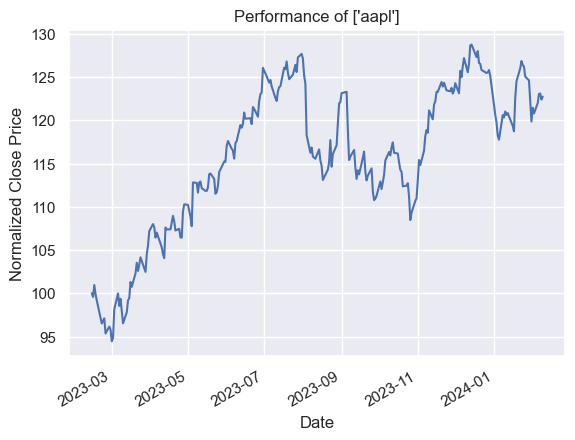

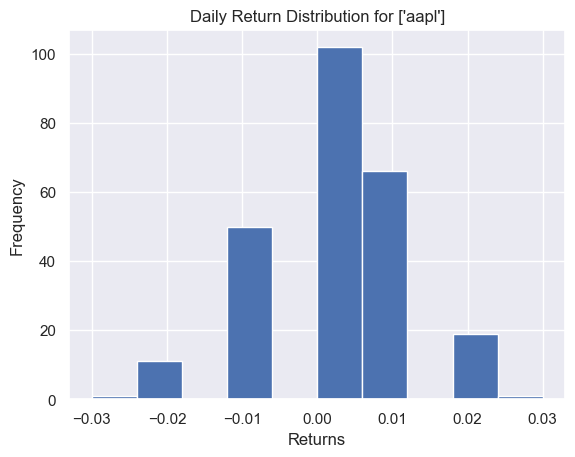

In [84]:
def main():
    # uncomment (remove pass) code below to test
    test = Stock(symbol=['aapl']) # optionally test custom data range
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()
    

if __name__ == '__main__':
    main() 